In [1]:
import torch
from models.jpeg import DiffJPEG
import cv2
import numpy as np

In [2]:
with torch.no_grad():
    img = cv2.imread("Lena.png")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    inputs = np.transpose(img, (2, 0, 1))
    inputs = inputs[np.newaxis, ...]

    tensor = torch.FloatTensor(inputs)
    jpeg = DiffJPEG(512, 512, differentiable=True)

    quality = 90
    jpeg.set_quality(quality)

    outputs = jpeg(tensor)
    outputs = outputs.detach()

In [3]:
tensor.max(), tensor.min(), tensor.shape

(tensor(242.), tensor(4.), torch.Size([1, 3, 512, 512]))

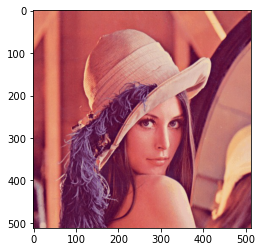

In [4]:
from torchvision.utils import save_image, make_grid
import matplotlib.pyplot as plt

plt.imshow(outputs[0].permute(1, 2, 0), vmin=0, vmax=255)

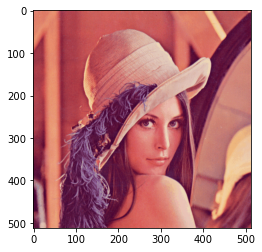

In [6]:
plt.imshow(img)

In [9]:
img.shape

(512, 512, 3)

In [17]:
import torchvision
quality = 100
enc_img = torchvision.io.encode_jpeg(torch.tensor(img).permute(2, 0, 1), quality=quality)
dec_img = torchvision.io.decode_jpeg(torchvision.io.encode_jpeg(torch.tensor(img).permute(2, 0, 1), quality=quality))

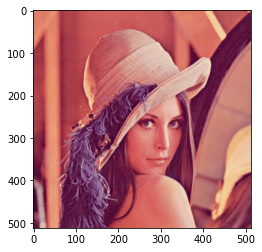

In [16]:
plt.imshow(dec_img.permute(1, 2, 0))

In [23]:
img = torch.tensor(img)
dec_img-img.permute(2, 0, 1)

/home/wangxu/anaconda3/envs/torch/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.


torch.uint8

In [5]:
outputs = np.transpose(outputs[0], (1, 2, 0))

outputs = cv2.cvtColor(outputs, cv2.COLOR_RGB2BGR)

cv2.imshow("QF:"+str(quality), outputs / 255.)
cv2.waitKey()

from skimage.metrics import peak_signal_noise_ratio as PSNR
img = cv2.imread("Lena.png")
print(PSNR(np.uint8(outputs), np.uint8(img)))

error: OpenCV(4.5.2) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'
